# t-SNE

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

https://nuancesprog.ru/p/14951/

In [10]:
df = pd.read_csv("C:/Users/Mary/Desktop/Диплом/final_df.csv")

In [14]:
df = df.drop(df.columns[0], axis=1)

In [16]:
df.head(2)

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178


In [54]:
#df[df['0'].round(6) == 0.054364	]

In [58]:
X = df.drop('Quadrant',axis=1)
y = df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Визуализация для 2-х компонент

In [148]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
# t-SNE для снижения размерности
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

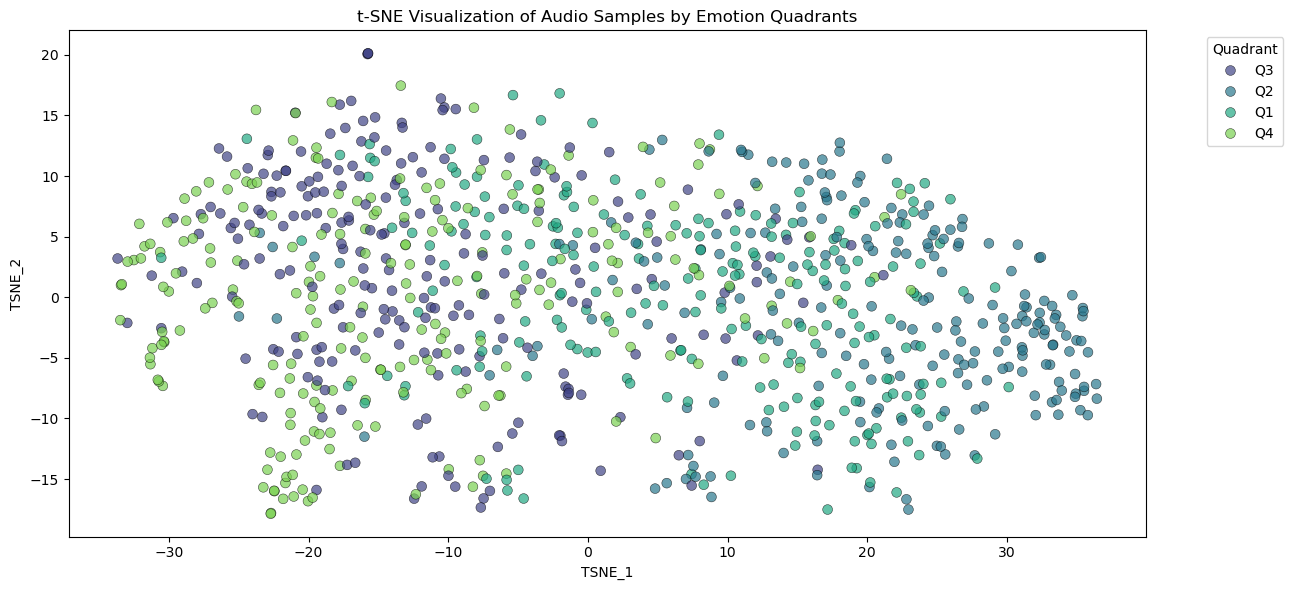

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Создание DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2'])
tsne_df['Quadrant'] = y

# Задаем четкую палитру и стили маркеров
palette = sns.color_palette("viridis", n_colors=4)  # Цвета

# Построение графика с hue и style
plt.figure(figsize=(13, 6))
sns.scatterplot(
    x='TSNE_1', y='TSNE_2',
    hue='Quadrant',
    palette=palette,
    data=tsne_df,
    s=50,              # Размер точек
    alpha=0.7,         # Прозрачность
    edgecolor='black', linewidth=0.4
)

plt.title('t-SNE Visualization of Audio Samples by Emotion Quadrants')
plt.legend(title='Quadrant', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Визуализация для 3-х компонент

In [77]:
# t-SNE для снижения размерности
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

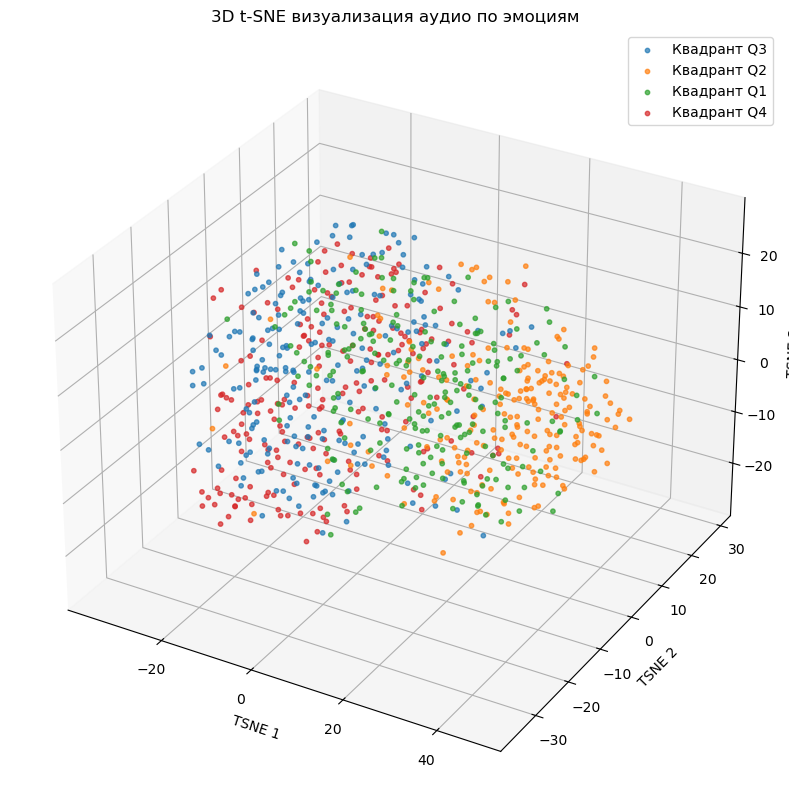

In [112]:
tsne_3d_df = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2', 'TSNE_3'])
tsne_3d_df['Quadrant'] = y  

# Создание 3D-графика
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Настраиваем цвета для классов
targets = tsne_3d_df['Quadrant'].unique()

# Рисуем точки для каждого квадранта
for target, color in zip(targets, colors):
    subset = tsne_3d_df[tsne_3d_df['Quadrant'] == target]
    ax.scatter(subset['TSNE_1'], subset['TSNE_2'], subset['TSNE_3'],
                label=f'Квадрант {target}', s=10, alpha=0.7)

# Добавляем подписи и легенду
ax.set_title('3D t-SNE визуализация аудио по эмоциям')
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_zlabel('TSNE 3')
ax.legend()
plt.show()
